# What makes a good book?

## Introduction

In this project, I will be conducting some exploratory data analysis using some data from Google Books.

I found this data set on Kaggle by Bilal Yussef. If you want to check this out yourself, here is the link: https://www.kaggle.com/bilalyussef/google-books-dataset?select=google_books_1299.csv

During this analysis I will be using 5 of the steps in the CRISP-DM process taught from the Udacity Data Science nanodegree:
1. __Business Understanding__
2. __Data Understanding__
3. __Data Preparation__
4. Modelling
5. __Evaluation__
6. __Deploy__

I will be also making sure to follow the process of: Gather, Assess, Clean, Analyse, (Model) and Visualise the data

I will not be using the modelling step in this instance, as the questions I am looking to answer involve more of exploratory data analysis. However, if I had a larger data set (that could be split into test and train) it would be interesting to see if it is possible to predict the rating of a book based on its features

## Business Understanding

To understand the data set some more and try and understand if any features, such as genre, author, price or length impact whether a book is regarded as 'good' we will answer the following questions:

1. What are the highest rated books?
2. Who are the highest rated authors?
3. Does length of the book impact the rating?
4. Does the price of the book impact the rating?
5. What genres appear are most common?


## Data Understanding

### Import the libraries

In [1]:
#Load the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

### GATHER -  Import data

In [2]:
# need to index col as in excel data set there is an unnamed column of indexes
# Need to save the data frame locally to access it using this code

df = pd.read_csv('./google_books_1299.csv', index_col=0)

### ASSESS - Understand the data

In [3]:
#view a section of the data
df.head()

,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"


In [4]:
#Get an understanding ofthe data
df.describe()

,rating,price,page_count
count,1224.000000,1299.000000,1.299000e+03
mean,4.424755,45.882733,1.505974e+10
std,0.392489,53.588444,3.836540e+11
min,2.500000,0.000000,7.000000e+00
25%,4.200000,22.470000,1.940000e+02
50%,4.500000,38.330000,3.040000e+02
75%,4.700000,59.030000,4.160000e+02
max,5.000000,886.080000,9.781302e+12


In [5]:
#look at the types of each column
df.dtypes

title              object
author             object
rating            float64
voters             object
price             float64
currency           object
description        object
publisher          object
page_count          int64
generes            object
ISBN               object
language           object
published_date     object
dtype: object

From this it is clear that only 3 columns are numerical, with many of the others being categorical or descriptive.
Voters and currency are also coming up as object when they should be numerical so we will have to change this. Published date should also be a date field, however we will not be using this in the analysis.

In [6]:
# Look at the the shape of the data set:
print(df.shape)
print('There are ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns')

(1299, 13)
There are 1299 rows and 13 columns


In [7]:
#check for null values
pd.isna(df).sum()

title              0
author             0
rating            75
voters            75
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     0
dtype: int64

There is clearly some nulls in this data set, which need to be dealt with (especially if we were to be doing any machine learning models). We will look at how to deal with these in the data cleaning section below

In [8]:
#check how many duplicates there are
df.duplicated().sum()

351

We have some rows in the data set that are duplicated, we would like to remove these so they don't get counted more than once. This will also be dealt with in the section below

## Data Preperation (CLEAN)

In the case of the 75 nulls in ratings, we would like to remove all entries with no rating, as this is the column we are most interested in. This is the best choice for this dataset as trying to use the mean or mode ratings to fill them in would not make sense, especially as we want to look at what features impact ratings.

In [9]:
#drop the rows where rating is null
df_cleaned = df.dropna(subset=['rating']) 

In [10]:
#check to see what nulls are left
pd.isna(df_cleaned).sum()

title             0
author            0
rating            0
voters            0
price             0
currency          0
description       3
publisher         0
page_count        0
generes           0
ISBN              0
language          0
published_date    0
dtype: int64

By doing this, I have also removed the nulls from the voters column. 
We can see that there is still 3 nulls in the description column, however we will not need this column for any of the questions, so can remove this too.

Also, we will not be using publisher, ISBN, language or published date so I will remove these now.
However, if further analysis was to be done on this data set there are many other interesting questions that could be asked using these. We may also want to keep these kind of variables if we were doing a machine learning algorithm (depends on how they correlate with the response variable)

In [11]:
#remove the columns not needed for the analysis
df_cleaned = df_cleaned.drop(['description','ISBN','publisher','language','published_date'], axis=1)

In [12]:
#check for nulls again
pd.isna(df_cleaned).sum()

title         0
author        0
rating        0
voters        0
price         0
currency      0
page_count    0
generes       0
dtype: int64

In [13]:
#Rename the 'generes' column so that it is spelt correctly:
df_cleaned.rename(columns = {'generes':'genres'}, inplace = True)

In [14]:
#check again on what the data frame looks like
df_cleaned.head()

,title,author,rating,voters,price,currency,page_count,genres
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,192,none
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,288,"Fiction , Mystery &amp, Detective , Cozy , Gen..."
2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,368,"Games &amp, Activities , Video &amp, Electronic"
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,320,none
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,544,"Fiction , Fantasy , Dark Fantasy"


In [15]:
#check the shape of the data set
print(df_cleaned.shape)
print('There are ' + str(df_cleaned.shape[0]) + ' rows and ' + str(df_cleaned.shape[1]) + ' columns')

(1224, 8)
There are 1224 rows and 8 columns


In [16]:
##Now we want to see how many duplicates we have and remove them:
df_cleaned.duplicated().sum()

333

In [17]:
# drop the duplicated rows
df_cleaned= df_cleaned.drop_duplicates()

In [18]:
#check that that worked
df_cleaned.duplicated().sum()

0

In [19]:
# check the new shape of the data set
print(df_cleaned.shape)
print('There are ' + str(df_cleaned.shape[0]) + ' rows and ' + str(df_cleaned.shape[1]) + ' columns')

(891, 8)
There are 891 rows and 8 columns


In [20]:
## We want to use price for our questions, but we have two columns related to money - price and currency
###Is the currency column useful?

#check the possible values of price when currency = Free
print(df[df['currency']=='Free']['price'].value_counts())
#check the possible values of currence when price = 0
print(df[df['price']== 0]['currency'].value_counts())


0.0    30
Name: price, dtype: int64
Free    30
Name: currency, dtype: int64


As expected, when the currency is 'Free' the price is 0 and vice versa, so we can removed the 'currency' column as it doesn't add anything to the analysis

In [21]:
# remove the currency column
df_cleaned = df_cleaned.drop(['currency'], axis=1)

In [22]:
#check the shape
print(df_cleaned.shape)
print('There are ' + str(df_cleaned.shape[0]) + ' rows and ' + str(df_cleaned.shape[1]) + ' columns')

(891, 7)
There are 891 rows and 7 columns


In [23]:
# look at the data types again to know what we may need to change
df_cleaned.dtypes

title          object
author         object
rating        float64
voters         object
price         float64
page_count      int64
genres         object
dtype: object

As spoken about in the data understanding section, we would like to make sure the data types make sense for analysis. For example, as it stands now if we tried to use voters as a number it would throw an error.

In [24]:
#Need to remove commas from the number to be able to change it to integer
df_cleaned['voters'] = df_cleaned['voters'].replace(',','', regex=True)

#The data types we would expect:
data_types_dict = {'title': str, 'author': str, 'rating': float, 
                   'voters': int, 'price': float, 'page_count': int, 'genres': str}

df_cleaned = df_cleaned.astype(data_types_dict)

In [25]:
df_cleaned.dtypes

title          object
author         object
rating        float64
voters          int32
price         float64
page_count      int32
genres         object
dtype: object

Since we are also looking at highest rated books we may also want to look at the weighted rating, which we are able to do as we have the number of voters.

In [26]:
#create a new column in the data set
df_cleaned['popularity_rating'] = df_cleaned['rating'] * df_cleaned['voters']

In [27]:
# check the dataset
df_cleaned.head()

,title,author,rating,voters,price,page_count,genres,popularity_rating
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,192,none,1968.8
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",75.9
2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,368,"Games &amp, Activities , Video &amp, Electronic",35.1
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,320,none,40.0
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,544,"Fiction , Fantasy , Dark Fantasy",2596.5


In [28]:
# check the number of values in each column
df_cleaned.count()

title                891
author               891
rating               891
voters               891
price                891
page_count           891
genres               891
popularity_rating    891
dtype: int64

In [29]:
#check number of unique values in each column
df_cleaned.nunique()

title                232
author               176
rating                18
voters               162
price                118
page_count            99
genres               226
popularity_rating    203
dtype: int64

There is only 232 unique titles out of all 891 entries which means it is likely to still be duplicates but with slightly different values in one or more columns. On further inspection (below) this is mainly because of the genres column being different for different entries.

In [30]:
#remove the genres column and drop duplicates
df_unique=df_cleaned.drop(['genres'],axis=1).drop_duplicates()

In [31]:
#check the shape
print(df_unique.shape)
print('There are ' + str(df_unique.shape[0]) + ' rows and ' + str(df_unique.shape[1]) + ' columns')

(233, 7)
There are 233 rows and 7 columns


In [32]:
### check to see if we only have 232 titles now
df_unique['title'].value_counts().head()

The Memoirs of Sherlock Holmes                                                                    2
15 Delicious Slow Cooker Recipes                                                                  1
Mistborn Trilogy: The Final Empire, The Well of Ascension, The Hero of Ages                       1
The Power of Habit: Why We Do What We Do in Life and Business                                     1
How to Make Money in Stocks: A Winning System in Good Times and Bad, Fourth Edition: Edition 4    1
Name: title, dtype: int64

By removing the genres column other duplicates have been removed. This shows that in the majority of cases the reason for duplicates was because of the genres column. The only title where this is not the case is: ' The Memoirs of Sherlock Holmes ' which still has 2 entries.

In [33]:
#There are 2 cases of the ' Memoirs of Sherlock holmes'
df_unique[df_unique['title']=='The Memoirs of Sherlock Holmes']

,title,author,rating,voters,price,page_count,popularity_rating
72,The Memoirs of Sherlock Holmes,Arthur Conan Doyle,4.2,3316,0.00,320,13927.2
92,The Memoirs of Sherlock Holmes,Sir Arthur Conan Doyle,4.7,6,2.73,208,28.2


The reason why this is appears twice is because there looks to be 2 editions of the book in the data set. Since they have different features (apart from the name) and different ratings I will still keep both versions in the data set.

By removing genres we now have 233 rows. This is how many we would like in the our final set, however we still want to use the genres to answer one of the questions.

To be able to use genres, we will find all the unique genres for each title/author combination and then we will link that back to the main table. I will make sure we do not duplicate genres by using sets. This process will be described in the code below:

In [34]:
## Create a column called Title Author to make sure that the 2 Sherlock books are distinct
## This is because the ratings of the books are different so we want to keep them seperated
df_cleaned['Title_Author']=df_cleaned['title']+ ": " + df_cleaned['author']
df_unique['Title_Author']=df_unique['title']+ ": " + df_unique['author']

In [35]:
## Checking we have 233 unique title/author combinations
df_cleaned['Title_Author'].nunique()

233

In [36]:
## Formatting on the genres column:
# replace "none" with a blank
df_cleaned['genres'] = df_cleaned['genres'].replace('none','', regex=True)

#replace &amp with blank:
df_cleaned['genres'] = df_cleaned['genres'].replace('&amp','', regex=True)

#create a dictionary with unique titles/authors as keys. We will put the full list of genres for each as the values:
#This will have an empty list for each value to start with:
keys = list(df_cleaned['Title_Author'].unique())
dictionary = dict.fromkeys(keys,[])

# for every Title_Author in the dictionary we will loop round the original "data_cleaned" data set and add 
# the appropriate genres:

for key in dictionary:
    # create a set where we will add the genres
    s=set()
    # we want to loop round each row in the data set
    for index, row in df_cleaned.iterrows():
        # whenever a title in the row is equal to the element in the dictionary we will look at the genres
        if key == row['Title_Author']:
            # first split the genres string into a list, as the string seperates genres using commas
            item_list = row['genres'].split(",")
            for i in item_list:
                # for each item in the list we will ignore it if it is blank
                if i=='':
                    pass
                # otherwise we add it into the temporary set for that dictionary key
                # I am using sets as this allows only unique values to be added (we don't want duplication)
                else:
                    s.add(i)
    
    #After we have created the set we will change this to a list:
    new_list = list(s)
    
    #If the list is empty we can ignore
    if new_list == []:
        pass
    #Otherwise we can add the list as the value of that key
    else:                    
        dictionary[key]=dictionary[key] + new_list


In [37]:
# Check the dictionary looks as expected by looking at first 5 elements:
for x in list(dictionary)[:5]:
    print (x ,dictionary[x])

Attack on Titan: Volume 13: Hajime Isayama [' Manga ', ' Graphic Novels ', 'Comics ', ' Science Fiction']
Antiques Roadkill: A Trash 'n' Treasures Mystery: Barbara Allan ['Fiction ', ' Mystery ', ' Private Investigators', ' Amateur Sleuth', ' Detective ', ' General', ' Cozy ']
The Art of Super Mario Odyssey: Nintendo ['Games ', 'Art ', ' Activities ', ' Video ', ' Video Game Art', ' Popular Culture', ' Electronic']
Getting Away Is Deadly: An Ellie Avery Mystery: Sara Rosett ['Fiction ', ' Mystery ', ' Women Sleuths', ' Amateur Sleuth', ' Detective ', ' General', ' Cozy ']
The Painted Man (The Demon Cycle, Book 1): Peter V. Brett [' Fantasy ', ' War ', ' Military', ' Epic', ' Supernatural', ' Action ', ' Dark Fantasy', ' General', 'Fiction ', ' Adventure', ' Thrillers ']


In [38]:
# Add these into a dataframe:
genres_data = pd.DataFrame(list(dictionary.items()),columns = ['Title_Author','genres'])

In [39]:
#check the data frame is as expected:
genres_data.head()

,Title_Author,genres
0,Attack on Titan: Volume 13: Hajime Isayama,"[ Manga , Graphic Novels , Comics , Science ..."
1,Antiques Roadkill: A Trash 'n' Treasures Myste...,"[Fiction , Mystery , Private Investigators, ..."
2,The Art of Super Mario Odyssey: Nintendo,"[Games , Art , Activities , Video , Video G..."
3,Getting Away Is Deadly: An Ellie Avery Mystery...,"[Fiction , Mystery , Women Sleuths, Amateur..."
4,"The Painted Man (The Demon Cycle, Book 1): Pet...","[ Fantasy , War , Military, Epic, Supernat..."


In [40]:
# Want to add the updated genres to the original data frame:
df_unique = df_unique.merge(genres_data, on='Title_Author', how='left')

In [41]:
# Check no nulls have been created
pd.isna(df_unique).sum()

title                0
author               0
rating               0
voters               0
price                0
page_count           0
popularity_rating    0
Title_Author         0
genres               0
dtype: int64

In [42]:
#Check the data frame
df_unique.head()

,title,author,rating,voters,price,page_count,popularity_rating,Title_Author,genres
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,192,1968.8,Attack on Titan: Volume 13: Hajime Isayama,"[ Manga , Graphic Novels , Comics , Science ..."
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,288,75.9,Antiques Roadkill: A Trash 'n' Treasures Myste...,"[Fiction , Mystery , Private Investigators, ..."
2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,368,35.1,The Art of Super Mario Odyssey: Nintendo,"[Games , Art , Activities , Video , Video G..."
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,320,40.0,Getting Away Is Deadly: An Ellie Avery Mystery...,"[Fiction , Mystery , Women Sleuths, Amateur..."
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,544,2596.5,"The Painted Man (The Demon Cycle, Book 1): Pet...","[ Fantasy , War , Military, Epic, Supernat..."


In [43]:
#Check it has kept the two Sherlock books seperate:
df_unique[df_unique['title']=='The Memoirs of Sherlock Holmes']

,title,author,rating,voters,price,page_count,popularity_rating,Title_Author,genres
57,The Memoirs of Sherlock Holmes,Arthur Conan Doyle,4.2,3316,0.00,320,13927.2,The Memoirs of Sherlock Holmes: Arthur Conan D...,"[ Mystery , General, Suspense, Classics, D..."
68,The Memoirs of Sherlock Holmes,Sir Arthur Conan Doyle,4.7,6,2.73,208,28.2,The Memoirs of Sherlock Holmes: Sir Arthur Con...,"[ Collections , Mystery , Anthologies, Dete..."


In [44]:
# Can remove the 'Title_Author' column:
df_unique = df_unique.drop(['Title_Author'], axis=1)

In [45]:
#check the shape
print(df_unique.shape)
print('There are ' + str(df_unique.shape[0]) + ' rows and ' + str(df_unique.shape[1]) + ' columns')

(233, 8)
There are 233 rows and 8 columns


In [46]:
#check the data frame again
df_unique.head()

,title,author,rating,voters,price,page_count,popularity_rating,genres
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,192,1968.8,"[ Manga , Graphic Novels , Comics , Science ..."
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,288,75.9,"[Fiction , Mystery , Private Investigators, ..."
2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,368,35.1,"[Games , Art , Activities , Video , Video G..."
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,320,40.0,"[Fiction , Mystery , Women Sleuths, Amateur..."
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,544,2596.5,"[ Fantasy , War , Military, Epic, Supernat..."


#### Prepare functions for plotting:
Now I have cleaned the data ready to be used, I am going to make some functions that will make it easier to visualise the data when plotting:

In [47]:
#For some of these we are going to want to plot some nice visualisations showing the top N authors, categories etc
#Therefore I am going to create a function that allows to plot this easily:

def bar_plot_function(dataframe,X,Y,N,asc=False):
    '''This function takes an item you want to order (Y) and what you want to order it by (X)
        so that you can plot this into a bar chart. 
        You can also choose how many items you want to appear in the bar chart (N) and if you 
        want the top or bottom values.
        
        INPUTS:
        - dataframe
        - X - the item you want on the X axis, this is what the data will be ordered by
            This is a vector incase you want to order by multiple things. The first one 
            will appear on the axis.
        - Y - the item you want on the Y axis, this is the item you want to be ordered
        - N - this is the number of items you'd like to appear in the bar chart
        - asc -  this is a boolean variable that decides if you want it ascending or descending
            this is automatically False (so shows top values)
            
        OUTPUT: 
        - Bar graph of X and Y
        
    '''
    # This is to help label the title as to whether we are showing bottom or top N values
    if asc== False:
        Order = 'Top'
    else:
        Order= 'Bottom'
        
    # If we are ordering by multiple values then add extra text into the title:
    if len(X)==1:
        text = ''
    else:
        text = ' then by '
        for i in range(1,len(X)):
            text = text + str(X[i].replace('_',' ').title())            
        
    
    #Create the dataframe by sorting by specific values and choosing the number you want to see
    data = dataframe.sort_values(by=X, ascending=asc).head(N)
    
    #reverse order of row so bar chart appears in same order as corresponding table
    data = data[::-1]    
    
    #set the values of x and y
    y = data[Y]
    x = data[X[0]]
    
    # Plot the chart:
    fig, ax = plt.subplots(figsize=(12,10))  
    ax.barh(y, x, 0.9, color =sns.color_palette('hls',N))

    #Add titles and axis
    plt.title('Bar Chart showing the ' + Order + ' '+ str(N) + ' ' + Y.capitalize() + 's by ' 
              + X[0].replace('_',' ').title() + text)
    plt.xlabel(X[0])
    plt.ylabel(Y)
    
    #Add text to the chart for labels
    for i, v in enumerate(x):
        ax.text(0.08, i, round(v,1), fontsize=10,color='white',weight='bold')
        
    plt.show()

In [48]:
def table_function(dataframe,X,Y,N,asc=False):
    '''This function takes an item you want to order (Y) and what you want to order it by (X)
        so that you can see them in a table. 
        You can also choose how many items you want to appear in the table (N) and if you want
        the top or bottom values
        
        INPUTS:
        - dataframe
        - X - the item you want to order by.This can be a vector if you want to order by multiple
            things.
        - Y - the item you want to be ordered
        - N - this is the number of items you'd like to appear in the table
        - asc -  this is a boolean variable that decides if you want it ascending or descending
            this is automatically False (so shows top values)
            
        OUTPUT: 
        - Table with the inputs given
    '''
    #Create the dataframe by sorting by specific values and choosing the number you want to see
    data = dataframe.sort_values(by=X, ascending=asc).head(N)
    
    #choose what columns we want to see (Y and X)
    X.insert(0,Y)
    
    #return the data
    data = data[X]
    return data

In [49]:
#For some of these we are going to want to plot some nice visualisations showing looking for correlation
#Therefore I am going to create a function that allows to plot this easily:

def scatter_graph_function(dataframe,X,Y):
    '''This function takes an item you want X and what you want to plot it against Y 
        INPUTS:
        - dataframe
        - X - the item you want on the X axis (this is not a vector)
        - Y - the item you want on the Y axis
        OUTPUT: 
        - Bar graph of X and Y
    '''    
    #do a scatter plot of X against Y
    plt.scatter(dataframe[X],dataframe[Y])
    plt.title('Scatter Graph showing ' + X.replace('_',' ').title() + ' against '+ Y.replace('_',' ').title())
 
    plt.show()

## Evaluation - ANALYSE/VISUALISE

### 1. What are the highest rating books?

In this section we are going to show the top rated books:

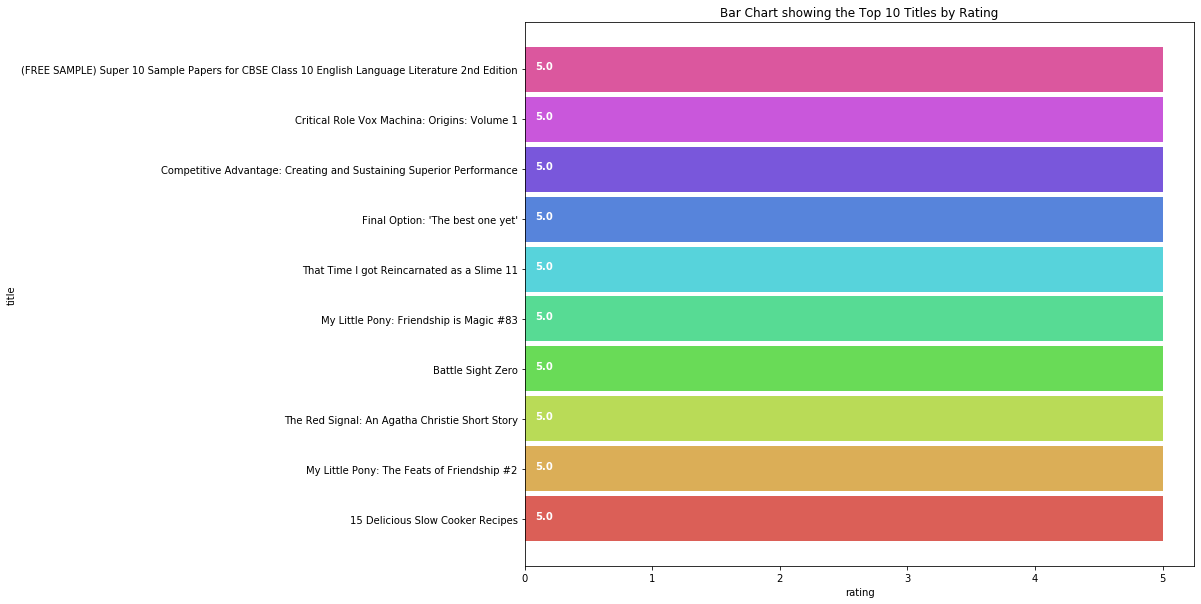

In [50]:
#Plot the top 10 titles by rating
bar_plot_function(df_unique,['rating'],'title',10)

In [51]:
#Show the table of top 10 items by rating
table_function(df_unique,['rating'],'title',10)

,title,rating
232,(FREE SAMPLE) Super 10 Sample Papers for CBSE ...,5.0
24,Critical Role Vox Machina: Origins: Volume 1,5.0
50,Competitive Advantage: Creating and Sustaining...,5.0
63,Final Option: 'The best one yet',5.0
17,That Time I got Reincarnated as a Slime 11,5.0
16,My Little Pony: Friendship is Magic #83,5.0
73,Battle Sight Zero,5.0
14,The Red Signal: An Agatha Christie Short Story,5.0
87,My Little Pony: The Feats of Friendship #2,5.0
125,15 Delicious Slow Cooker Recipes,5.0


In [52]:
## We can see there are multiple with the same 5 star rating which is why we create popularity rating
print ('The number of books with a 5 star rating is: ' + str(df_cleaned[df_cleaned['rating']==5]['title'].count()))

The number of books with a 5 star rating is: 76


As you can see from the table it automatically showed the top 10 of the 76 5 star rated books, but by alphabetical order. This isn't the best way to order them, as it would be better to order them by popularity (ie the number of times they have been voted). This is why we allowed a vector to be entered into the function:

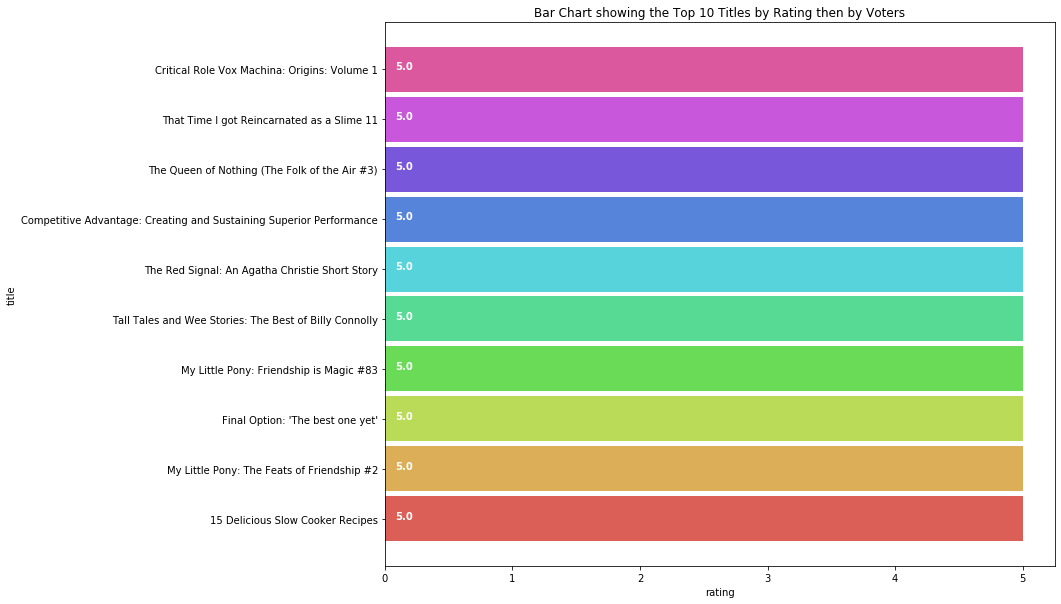

In [53]:
#Plot the top 10 title by rating, but also order by voters
bar_plot_function(df_unique,['rating','voters'],'title',10)

In [54]:
#Show the top 10 title by rating, but also ordered by voters in a table
table_function(df_unique,['rating','voters'],'title',10)

,title,rating,voters
24,Critical Role Vox Machina: Origins: Volume 1,5.0,15
17,That Time I got Reincarnated as a Slime 11,5.0,13
183,The Queen of Nothing (The Folk of the Air #3),5.0,11
50,Competitive Advantage: Creating and Sustaining...,5.0,6
14,The Red Signal: An Agatha Christie Short Story,5.0,4
27,Tall Tales and Wee Stories: The Best of Billy ...,5.0,4
16,My Little Pony: Friendship is Magic #83,5.0,3
63,Final Option: 'The best one yet',5.0,3
87,My Little Pony: The Feats of Friendship #2,5.0,3
125,15 Delicious Slow Cooker Recipes,5.0,3


Instead of viewing it this way we may want to see the most "popular" books by using our popularity rating metric

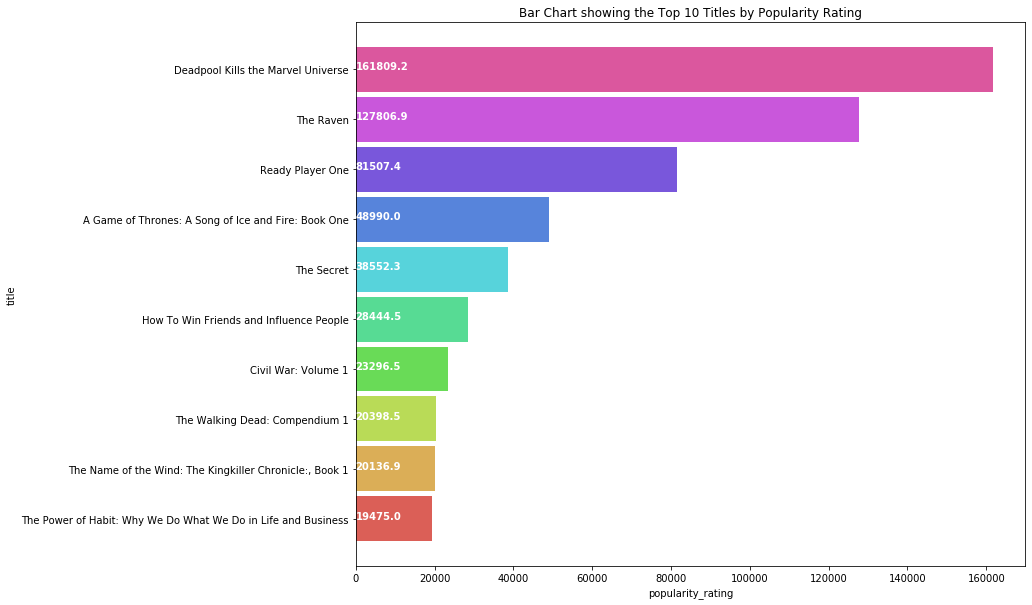

In [55]:
# Plot the top 10 titles by populartity rating
bar_plot_function(df_unique,['popularity_rating'],'title',10)

In [56]:
#Show this in a table
table_function(df_unique,['popularity_rating'],'title',10)

,title,popularity_rating
13,Deadpool Kills the Marvel Universe,161809.2
44,The Raven,127806.9
37,Ready Player One,81507.4
55,A Game of Thrones: A Song of Ice and Fire: Boo...,48990.0
159,The Secret,38552.3
39,How To Win Friends and Influence People,28444.5
47,Civil War: Volume 1,23296.5
172,The Walking Dead: Compendium 1,20398.5
85,The Name of the Wind: The Kingkiller Chronicle...,20136.9
146,The Power of Habit: Why We Do What We Do in Li...,19475.0


### 2. Who are the highest rating authors?

In this section we are going to the same by now by author. This would be more interesting in a larger data set as an author may have written multiple highly rated books. However, as we have very few books in this data set it is likely that the author will correspond to the book in the previous question.

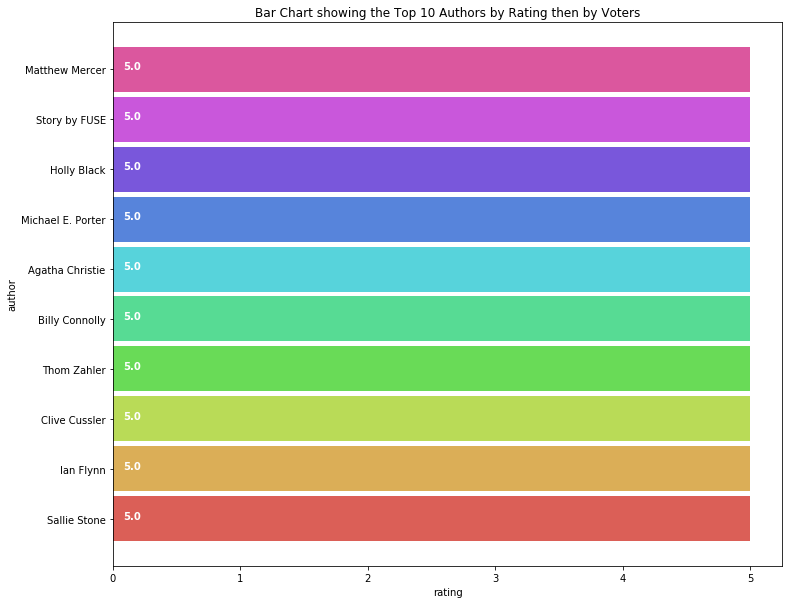

In [57]:
#Plot the top 10 authors by rating and then by voters
bar_plot_function(df_unique,['rating','voters'],'author',10)

In [58]:
#Show the top 10 authors by rating and then by voters in  a table
table_function(df_unique,['rating','voters'],'author',10)

,author,rating,voters
24,Matthew Mercer,5.0,15
17,Story by FUSE,5.0,13
183,Holly Black,5.0,11
50,Michael E. Porter,5.0,6
14,Agatha Christie,5.0,4
27,Billy Connolly,5.0,4
16,Thom Zahler,5.0,3
63,Clive Cussler,5.0,3
87,Ian Flynn,5.0,3
125,Sallie Stone,5.0,3


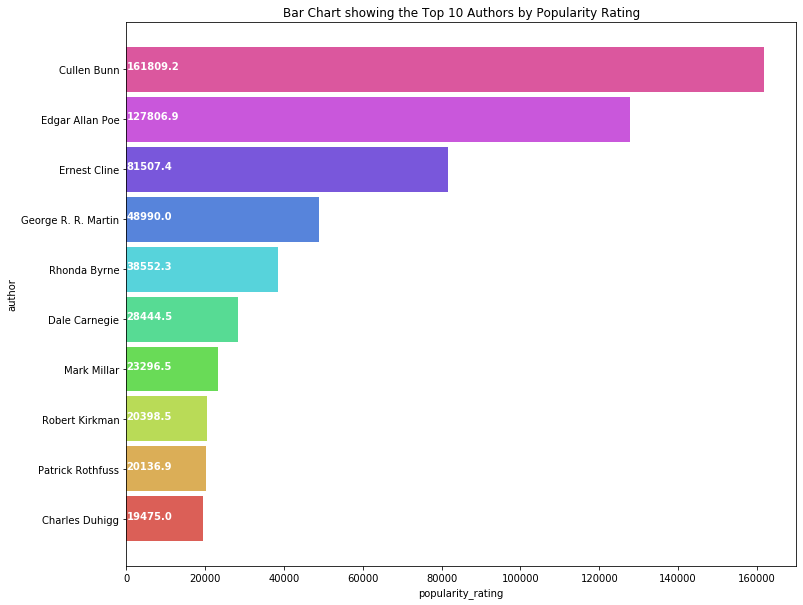

In [59]:
# Plot the top 10 authors by popularity rating
bar_plot_function(df_unique,['popularity_rating'],'author',10)

In [60]:
#Show the corresponding table
table_function(df_unique,['popularity_rating'],'author',10)

,author,popularity_rating
13,Cullen Bunn,161809.2
44,Edgar Allan Poe,127806.9
37,Ernest Cline,81507.4
55,George R. R. Martin,48990.0
159,Rhonda Byrne,38552.3
39,Dale Carnegie,28444.5
47,Mark Millar,23296.5
172,Robert Kirkman,20398.5
85,Patrick Rothfuss,20136.9
146,Charles Duhigg,19475.0


### 3. Does length of the book impact the rating?

In this section we would like to see if there is any correlation between page count and rating:

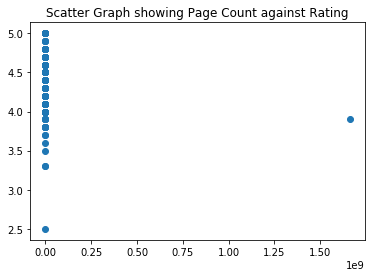

In [61]:
 #plot page count by rating
scatter_graph_function(df_unique,'page_count', 'rating')

This graph is clearly skewed by an outlier so we will edit the dataframe to show only books with a max page limit

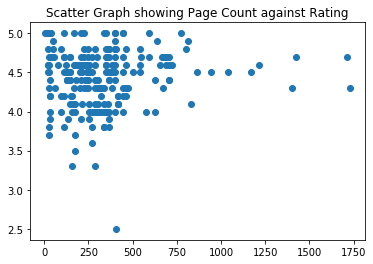

In [62]:
 #plot page count by rating (only where page count is less than 4000)
scatter_graph_function(df_unique[df_unique['page_count']<4000],'page_count', 'rating')

In [63]:
#check the correlation coefficient
np.corrcoef(df_unique[df_unique['page_count']<4000]['rating'],df_unique[df_unique['page_count']<4000]['page_count'])

array([[1.        , 0.07725605],
       [0.07725605, 1.        ]])

There is very little correlation between length and rating from this graph and also the correlation coefficient. This may be more interesting to explore in a larger data set.

### 4. Does price of the book impact the rating?

We will now see if price of book has a relationship with rating

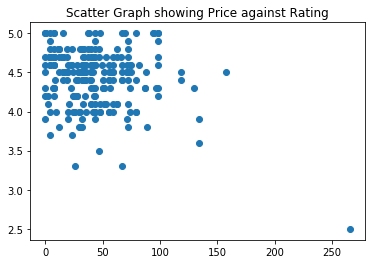

In [64]:
#plot rating by price
scatter_graph_function(df_unique,'price','rating')

In [65]:
#check this correlation coefficient
np.corrcoef(df_unique['rating'],df_unique['price'])

array([[ 1.        , -0.22941686],
       [-0.22941686,  1.        ]])

This shows a stronger negative correlation, but still is a mild correlation

In [66]:
#check this again but whilst removing the outlier
np.corrcoef(df_unique[df_unique['price']<200]['rating'],df_unique[df_unique['price']<200]['price'])

array([[ 1.        , -0.08891849],
       [-0.08891849,  1.        ]])

### 5. What genre of film appears most often?

I am not interested to see what genres appear the most in the data set:

In [67]:
#Get a list of all the genres in the data set:
full_genre_list = []
for i in df_unique['genres']:
    #if it is an empty list we will skip through
    if i==[]:
        pass
    else:
        #Otherwise we go through every element in that list
        # We do not care about duplicates here
        for j in range(len(i)):
            full_genre_list.append(i[j])

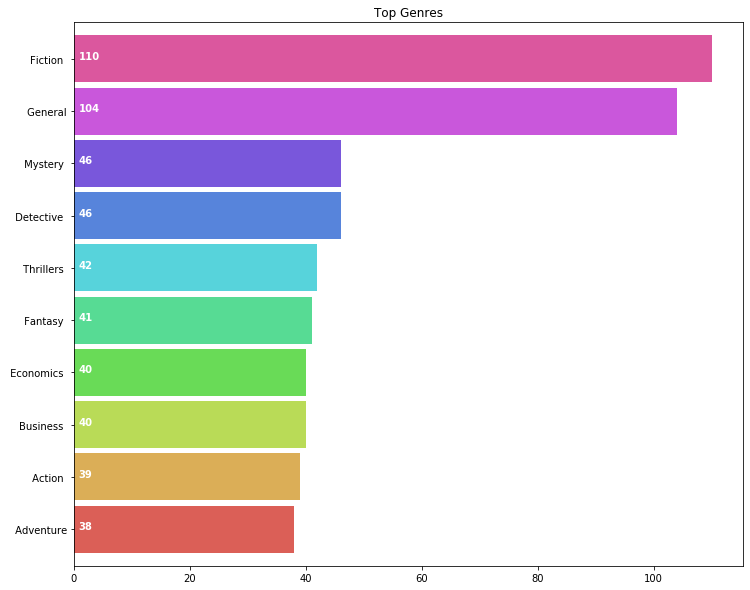

In [68]:
#Plot the count plot of the genres@
plt.subplots(figsize=(12,10))

ax = pd.Series(full_genre_list).value_counts()[:10].sort_values(
    ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))

#Label the bars
for i, v in enumerate(pd.Series(full_genre_list).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
    
plt.title('Top Genres')
plt.show()

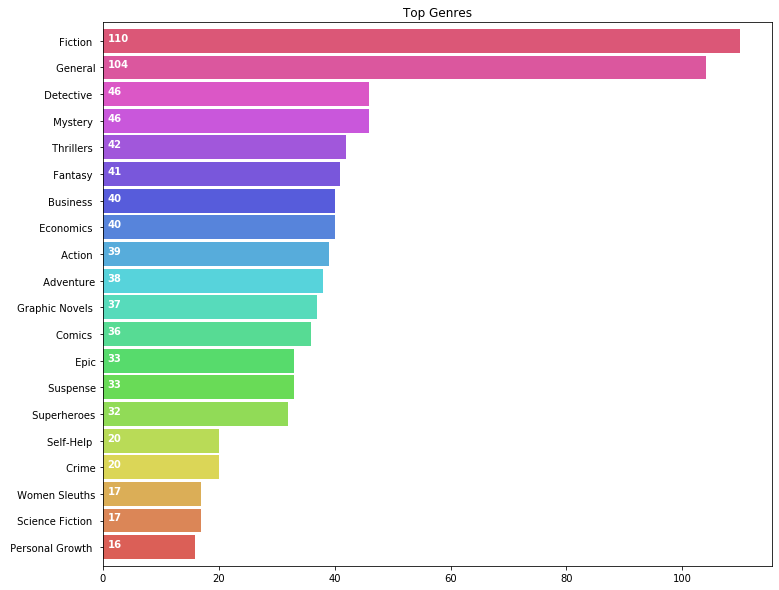

In [69]:
#Plot the count plot of the genres@
plt.subplots(figsize=(12,10))

ax = pd.Series(full_genre_list).value_counts()[:20].sort_values(
    ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',20))

#Label the genres
for i, v in enumerate(pd.Series(full_genre_list).value_counts()[:20].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
    
plt.title('Top Genres')
plt.show()

## Learnings

My analysis of the data can be found in my medium blog post: https://medium.com/@samanthahakes/what-makes-a-good-book-1440b80d6ada

Unfortunately, when picking this data set there appeared to be a larger set of books than there were, this was due to duplication. Because of this it meant I was not able to build a machine learning model nor get any reliable conclusions from the data. However, this data set was very helpful in teaching me how to clean data.